<a href="https://colab.research.google.com/github/Zemfira-Baisheva/Desserts_bot/blob/main/09_02_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-385-gb968b2d7 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [ ]:
import torch
from PIL import Image
import os
import matplotlib.pyplot as plt
from torchvision.io import read_image
from torchvision import transforms as T

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="SR231xEkoFqAOtIirSv3")
project = rf.workspace("dessert-bmtgm").project("dessert-zemfira")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dessert-zemfira-1 in yolov5pytorch:: 100%|██████████| 752/752 [00:00<00:00, 3234.72it/s]


In [ ]:
# Train!
!python /content/yolov5/train.py --batch 16 --epochs 300 --data //content/yolov5/dessert-zemfira-1/data.yaml --weights yolov5n.pt

Выходные данные были обрезаны до нескольких последних строк (5000).
  with torch.cuda.amp.autocast(amp):
    193/299      2.44G    0.01841    0.02059  0.0005892         45        640: 100% 21/21 [00:06<00:00,  3.24it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:00<00:00,  1.36it/s]
                   all         31         84      0.959      0.772      0.896      0.666

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  0% 0/21 [00:00<?, ?it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
    194/299      2.44G    0.01803    0.02087   0.000612        110        640:   5% 1/21 [00:00<00:03,  5.03it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with

Инференс собственной модели

In [ ]:
model = torch.hub.load(
    # будем работать с локальной моделью в текущей папке
    repo_or_dir = '.',
    # непредобученная – будем подставлять свои веса
    model = 'custom',
    # путь к нашим весам
    path='/content/yolov5/runs/train/exp/weights/best.pt',
    # откуда берем модель – наша локальная
    source='local'
    )

YOLOv5 🚀 v7.0-385-gb968b2d7 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 1763224 parameters, 0 gradients, 4.1 GFLOPs
Adding AutoShape... 


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


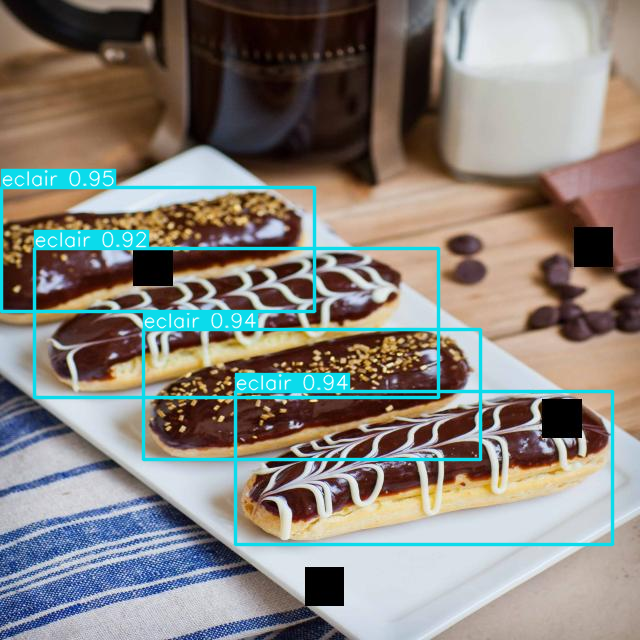

In [ ]:
import torchvision.transforms as T
# Начиная с какой вероятности отрисовывать детекции
model.conf = 0.7
# Читаем картинку
img = T.ToPILImage()(read_image('/content/yolov5/dessert-zemfira-1/train/images/30b25bc53bfa96762f8ab4ebde5b58d5_jpg.rf.2a03be24ddab6a4433791d05af895fc7.jpg'))
model.eval()
with torch.inference_mode():
    results = model(img)
# results.show()  # or .show(), .save(), .crop(), .pandas(), render(), etc
results.show()

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


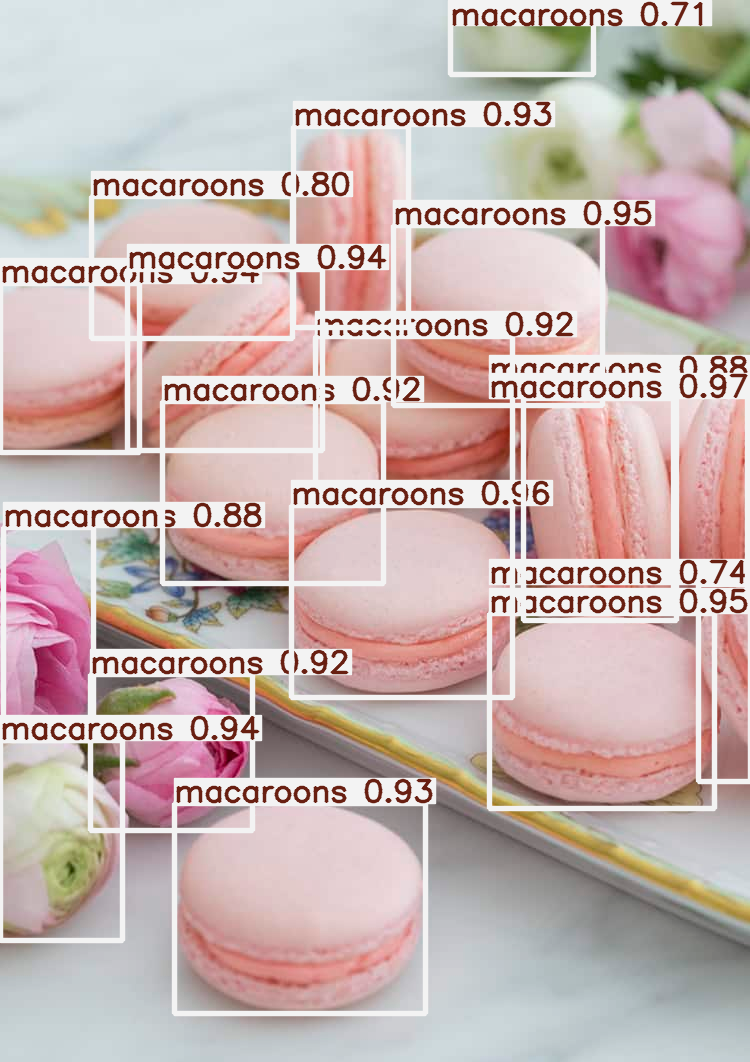

In [89]:
img = T.ToPILImage()(read_image('/content/drive/MyDrive/Colab Notebooks/cinabons/macaroons_2.png'))
model.eval()
with torch.inference_mode():
    results = model(img)
# results.show()  # or .show(), .save(), .crop(), .pandas(), render(), etc
results.show()

In [91]:
torch.save(model.state_dict(),'/content/yolov5_weight.pth')